In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(1, '../')
from utils import topoPlotIndie

In [2]:
data = scipy.io.loadmat("../data/sampleEEGdata.mat")

data = data['EEG']
times = data['times'][0][0][0].T
srate = data['srate'][0][0][0][0]
eeg = data['data'][0][0]

times2plot = np.arange(-200, 800, 50)

tidx = np.zeros(len(times2plot))
for i in range(len(tidx)):
    tidx[i] = np.argmin(abs(times - times2plot[i]))

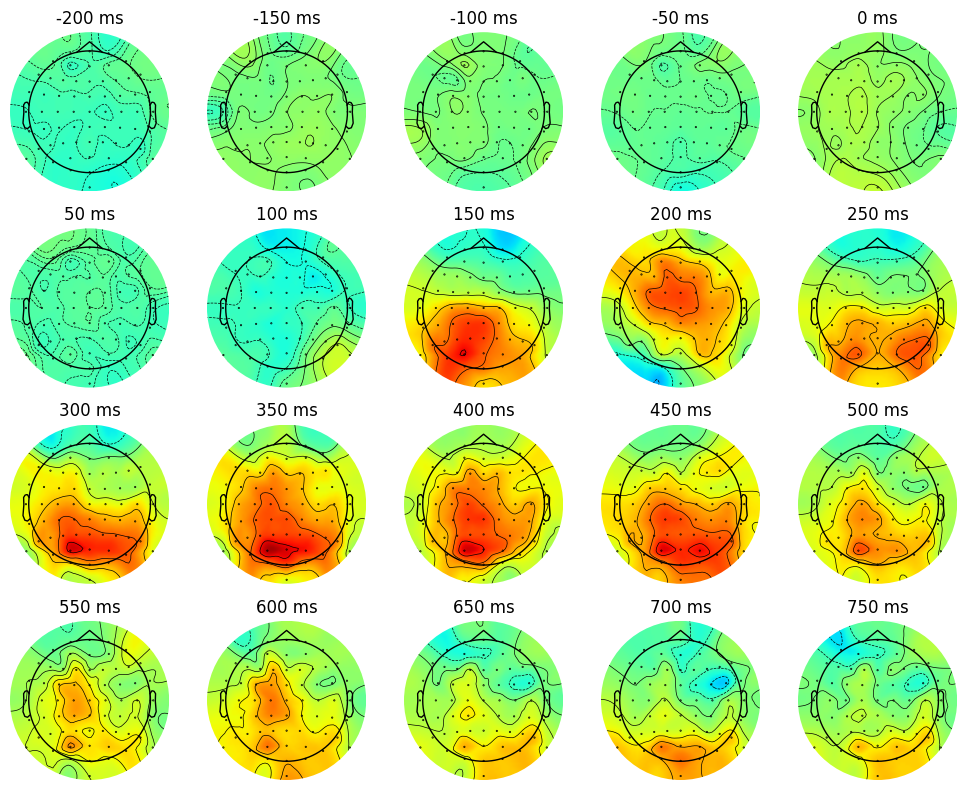

In [3]:
subgeomR = int(np.ceil(np.sqrt(len(tidx))))
subgeomC = int(np.ceil(len(tidx) / subgeomR))

fig, axes = plt.subplots(subgeomC, subgeomR, figsize=(10, 8))

if isinstance(axes, np.ndarray):
    axes = axes.ravel()

for i, t in enumerate(tidx):
    topoPlotIndie(data, np.mean(eeg[:, int(t), :], axis=1), axes[i], f"{int(times2plot[i])} ms", vlim=(-10,10), cmap="jet")

for j in range(len(tidx), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


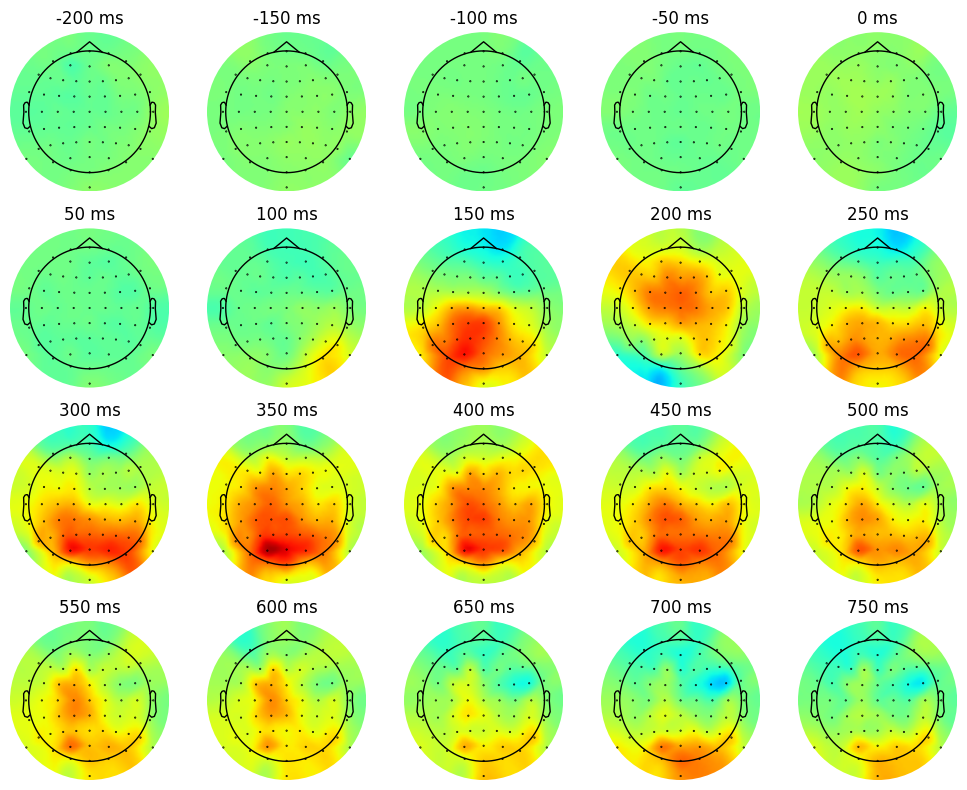

In [4]:
twin = 10
twinidx = round(twin / (1000 / srate))

fig, axes = plt.subplots( subgeomC, subgeomR, figsize=(10, 8))

if isinstance(axes, np.ndarray):
    axes = axes.ravel()

for i, t in enumerate(tidx):
    times2ave = np.arange(t - twinidx, t + twinidx + 1) 
    data_to_plot = np.mean(np.mean(eeg[:, int(times2ave[0]):int(times2ave[-1]), :], axis=2), axis=1) 
    topoPlotIndie(data, data_to_plot, axes[i], title=f"{times2plot[i]} ms", cmap="jet", vlim=(-10,10), contours=0)


for j in range(len(tidx), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
